In [1]:
import pandas as pd  # Mengimpor library pandas untuk manipulasi data
import matplotlib.pyplot as plt  # Untuk membuat visualisasi grafik
import seaborn as sns  # Library visualisasi yang lebih estetis dan ringkas
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Untuk encoding label dan standarisasi fitur numerik
from imblearn.over_sampling import SMOTE  # Untuk mengatasi imbalance dataset dengan SMOTE (Synthetic Minority Oversampling Technique)


In [2]:
# Load dataset
df = pd.read_csv("ObesityDataSet.csv")  # Membaca dataset dari file CSV
target_col = 'NObeyesdad'  # Menyimpan nama kolom target (label)
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']  # Daftar kolom numerik
categorical_columns = [col for col in df.columns if col not in numerical_columns + [target_col]]  # Kolom selain numerik dan target dianggap kategorikal


In [3]:
# Label encoding untuk semua kolom kategorikal
le_dict = {}  # Menyimpan encoder untuk masing-masing kolom
for col in categorical_columns:
    le = LabelEncoder()  # Membuat objek encoder
    df[col] = le.fit_transform(df[col].astype(str))  # Melakukan encoding terhadap nilai string
    le_dict[col] = le  # Simpan encoder ke dictionary

In [4]:
# ------------------------------
# 2. Handling Missing Values
# ------------------------------
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')  # Konversi ke numerik, nilai gagal jadi NaN
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())  # Mengisi nilai NaN dengan median
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Mengisi NaN pada kategori dengan modus (nilai yang paling sering muncul)


In [5]:
# ------------------------------
# 3. Hapus Duplikat
# ------------------------------
df.drop_duplicates(inplace=True)  # Menghapus baris duplikat langsung dari dataframe

In [6]:
# 4. Informasi umum dataset
print("\nInformasi Umum Dataset:")
print(df.info())  # Menampilkan ringkasan struktur dataframe

print("Jumlah data awal:", len(df))  # Menampilkan jumlah data setelah pembersihan
print("Jumlah data duplikat:", df.duplicated().sum())  # Jumlah data yang duplikat (harusnya 0 setelah drop)
df.drop_duplicates(inplace=True)  # (Ulangi) menghapus duplikat jika ada yang tersisa
print("Jumlah data setelah duplikat dihapus:", len(df))  # Tampilkan jumlah data terkini



Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2092 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2092 non-null   float64
 1   Gender                          2092 non-null   int32  
 2   Height                          2092 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2092 non-null   int32  
 5   FAVC                            2092 non-null   int32  
 6   FCVC                            2092 non-null   float64
 7   NCP                             2092 non-null   float64
 8   SCC                             2092 non-null   int32  
 9   SMOKE                           2092 non-null   int32  
 10  CH2O                            2092 non-null   float64
 11  family_history_with_overweight  2092 non-null   int32  
 12  FAF           

In [7]:
print("Jumlah data awal:", len(df))
print("Jumlah data duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Jumlah data setelah duplikat dihapus:", len(df))

Jumlah data awal: 2092
Jumlah data duplikat: 0
Jumlah data setelah duplikat dihapus: 2092


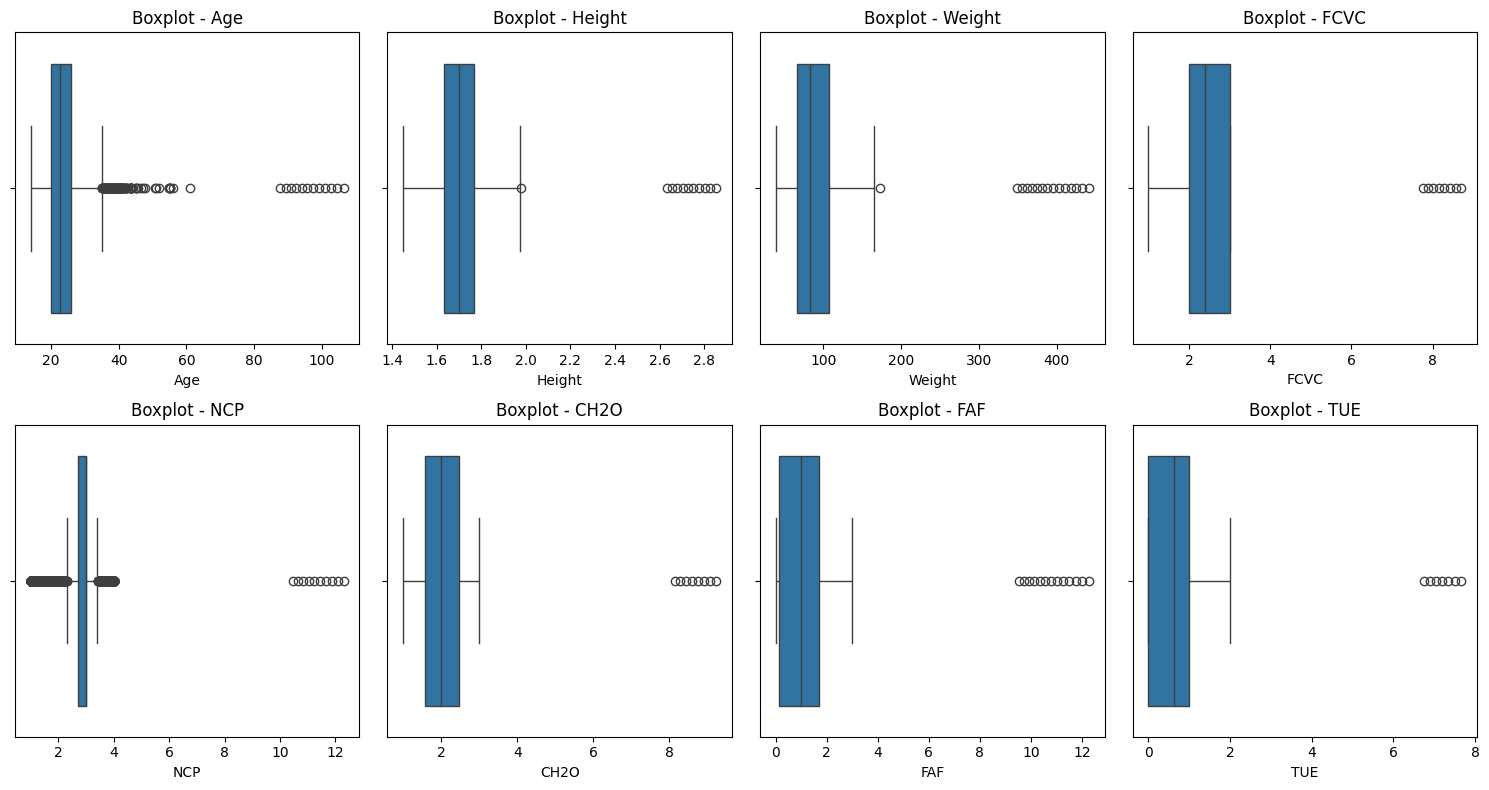

In [8]:
# 11. Deteksi outlier menggunakan boxplot
plt.figure(figsize=(15, 8))  # Atur ukuran grafik
for i, col in enumerate(numerical_columns, 1):  # Loop setiap kolom numerik
    plt.subplot(2, 4, i)  # Buat subplot 2 baris, 4 kolom
    sns.boxplot(data=df, x=col)  # Tampilkan boxplot untuk kolom tersebut
    plt.title(f'Boxplot - {col}')  # Judul boxplot
plt.tight_layout()  # Atur layout agar tidak tumpang tindih
plt.show()  # Tampilkan grafik


In [9]:
# 3. Tangani outlier (gunakan IQR method untuk kolom numerik)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # Kuartil pertama
    Q3 = df[col].quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  # Potong nilai di luar batas IQR


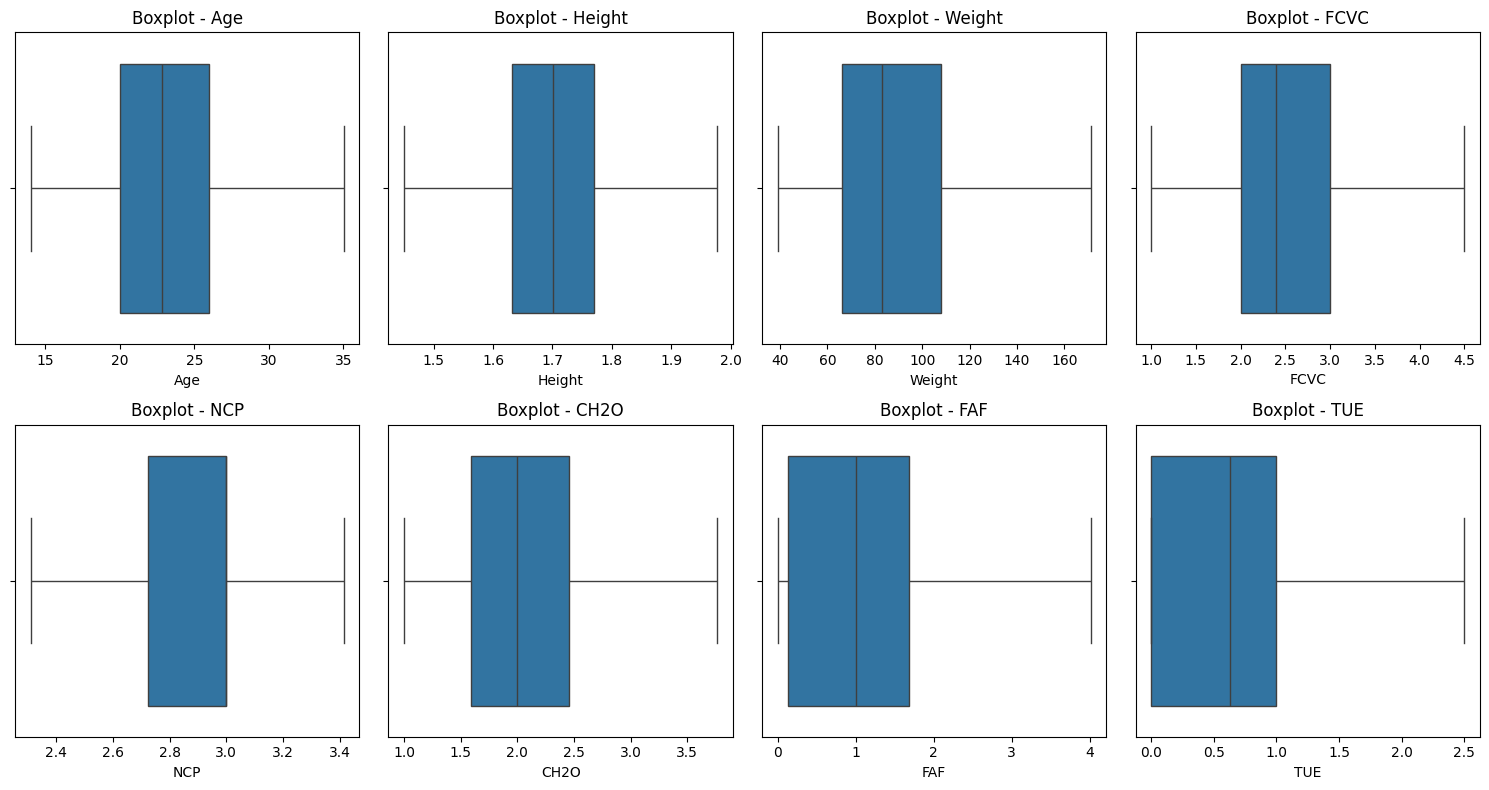

In [10]:
# 11. Deteksi outlier setelah pemotongan
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


In [11]:
# Cek distribusi kelas pada data sebelum SMOTE
y = df['NObeyesdad']  # Ambil label/target
print("Distribusi kelas sebelum SMOTE:")
print(y.value_counts())  # Tampilkan distribusi label


Distribusi kelas sebelum SMOTE:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          285
Overweight_Level_I     276
Insufficient_Weight    269
Name: count, dtype: int64


In [12]:
# ------------------------------
# 5. SMOTE (Tanpa One-Hot Encoding)
# ------------------------------
X = df[numerical_columns + categorical_columns]  # Gabungkan semua fitur (numerik + kategorikal)
y = df[target_col]  # Target label

smote = SMOTE(random_state=42)  # Inisialisasi SMOTE dengan seed acak 42
X_resampled, y_resampled = smote.fit_resample(X, y)  # Lakukan oversampling pada data minoritas


In [13]:
# ------------------------------
# 6. Standarisasi Fitur Numerik
# ------------------------------
scaler = StandardScaler()  # Inisialisasi standard scaler
X_resampled[numerical_columns] = scaler.fit_transform(X_resampled[numerical_columns])  # Skala hanya kolom numerik


In [14]:
# ------------------------------
# 7. Cek Distribusi Kelas dan Statistik
# ------------------------------
print("Distribusi kelas setelah SMOTE:")
print(pd.Series(y_resampled).value_counts())  # Tampilkan distribusi label setelah SMOTE

print("\nStatistik numerik setelah standarisasi:")
print(X_resampled[numerical_columns].describe())  # Statistik deskriptif dari fitur numerik setelah standarisasi


Distribusi kelas setelah SMOTE:
NObeyesdad
Normal_Weight          351
Overweight_Level_I     351
Overweight_Level_II    351
Obesity_Type_I         351
Insufficient_Weight    351
Obesity_Type_II        351
Obesity_Type_III       351
Name: count, dtype: int64

Statistik numerik setelah standarisasi:
                Age        Height        Weight          FCVC           NCP  \
count  2.457000e+03  2.457000e+03  2.457000e+03  2.457000e+03  2.457000e+03   
mean  -1.619471e-16  2.336665e-15 -2.313529e-16 -5.552471e-16 -4.395706e-16   
std    1.000204e+00  1.000204e+00  1.000204e+00  1.000204e+00  1.000204e+00   
min   -1.877043e+00 -2.695089e+00 -1.744857e+00 -2.642489e+00 -1.720384e+00   
25%   -7.590417e-01 -7.557901e-01 -7.781101e-01 -7.910098e-01 -5.241198e-01   
50%   -2.055703e-01 -1.106515e-02 -1.354766e-01 -5.544674e-02  3.873928e-01   
75%    3.984479e-01  6.886021e-01  7.479429e-01  1.060469e+00  3.873928e-01   
max    2.107962e+00  2.896016e+00  3.168425e+00  3.837688e+00  1.6520

In [15]:
df_preprocessed = X_resampled.copy()  # Salin data hasil preprocessing
df_preprocessed[target_col] = y_resampled  # Tambahkan kembali kolom target ke dataset

# Simpan hasil preprocessing ke CSV
df_preprocessed.to_csv("ObesityDataSet_preprocessed12.csv", index=False)  # Simpan dataset hasil preprocessing

Penanganan Missing Values
Kolom numerik yang memiliki nilai hilang ditangani dengan median, untuk menghindari pengaruh outlier.
Kolom kategorikal ditangani dengan modus (nilai terbanyak) untuk menjaga konsistensi data.
Penghapusan Duplikasi
Duplikasi dalam dataset terdeteksi dan dihapus untuk memastikan kualitas data dan mencegah bias.
Penanganan Outlier
Menggunakan metode IQR (Interquartile Range) untuk mengidentifikasi dan menangani outlier pada kolom numerik.
Alih-alih menghapus, nilai-nilai yang berada di luar batas bawah dan atas diclipping agar tetap dalam rentang normal.
Visualisasi dengan boxplot digunakan untuk memverifikasi hasil penanganan outlier.
Pembersihan Akhir
Dataset akhir menjadi lebih bersih, konsisten, dan siap untuk digunakan pada proses analisis atau pemodelan selanjutnya.